In [112]:
#EDA and Data Pre-Processing
#import the necessary libs and import the data 
#understanding
'''NaN: '', '#N/A', '#N/A N/A', '#NA', '-1.#IND', '-1.#QNAN', '-NaN', '-nan',
    '1.#IND', '1.#QNAN', '<NA>', 'N/A', 'NA', 'NULL', 'NaN', 'n/a',
    'nan', 'null'.'''
import pandas as pd 
data = pd.read_csv("./data/companytest.csv")

In [3]:
#NaN - No a number, NULL, n/a
data.head(20)

Company    Age     Salary
0        b   40.0  9000000.0
1        d  300.0     1000.0
2        a   30.0     -400.0
3      'a'   20.0        NaN
4        c   30.0        NaN
5      'a'   35.0     2300.0
6        c   40.0     3000.0
7        a   23.0     4000.0
8        c    NaN     5000.0
9        a    NaN     6000.0
10     'c'   23.0     7000.0
11       a   34.0     8000.0
12       b   45.0     9000.0
13       b   23.0        NaN
14       b   34.0     1089.0
15       b   45.0        NaN
16       b   18.0     1234.0
17     NaN   40.0     3000.0
18       a   23.0     3000.0
19       c   23.0     3030.0

## 1. Issue in data - Missing Values 
'''NaN: '', '#N/A', '#N/A N/A', '#NA', '-1.#IND', '-1.#QNAN', '-NaN', '-nan',
    '1.#IND', '1.#QNAN', '<NA>', 'N/A', 'NA', 'NULL', 'NaN', 'n/a',
    'nan', 'null'.'''

In [7]:
data.shape

(33, 3)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Company  30 non-null     object 
 1   Age      29 non-null     float64
 2   Salary   26 non-null     float64
dtypes: float64(2), object(1)
memory usage: 920.0+ bytes


In [9]:
#Na - NaN - Not a Number
#Na - Not available
data.isna().sum()

Company    3
Age        4
Salary     7
dtype: int64

In [4]:
#Exercise-1 Write code which gives me a new dataframe with percentage of missing values as a column
#missing_data - column_names, percentage(of missing values)
Column_name   Percentage

company       
Age 
salary

(33, 3)

In [14]:
total = data.isnull().sum().sort_values(ascending = False)
percent = ((data.isnull().sum())/data.isnull().count()).sort_values(ascending = False)
missing_data = pd.concat([total,percent],axis = 1,keys = ['Total','Percent'])

In [15]:
missing_data

Total   Percent
Salary       7  0.212121
Age          4  0.121212
Company      3  0.090909

In [23]:
train_data = pd.read_csv('./data/train.csv')

In [26]:
train_data.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

### Fixing the missing value in a dataset! 


#### Column level operation 
1. If column has more missing percent - Drop the column > 30% consider dropping

#### Row level operation 
1. Drop all the null row values - dropna - or 
2. Drop null row (dropna) values as subset of a column 
    1. Reset the index - Function iterating the dataframe will find missing index

In [27]:
data_nonull = data.dropna()

In [29]:
data_nonull.isna().sum()

Company    0
Age        0
Salary     0
dtype: int64

In [34]:
data.dropna(subset = ['Company']).reset_index(drop=True)

index Company    Age     Salary
0       0       b   40.0  9000000.0
1       1       d  300.0     1000.0
2       2       a   30.0     -400.0
3       3     'a'   20.0        NaN
4       4       c   30.0        NaN
5       5     'a'   35.0     2300.0
6       6       c   40.0     3000.0
7       7       a   23.0     4000.0
8       8       c    NaN     5000.0
9       9       a    NaN     6000.0
10     10     'c'   23.0     7000.0
11     11       a   34.0     8000.0
12     12       b   45.0     9000.0
13     13       b   23.0        NaN
14     14       b   34.0     1089.0
15     15       b   45.0        NaN
16     16       b   18.0     1234.0
17     18       a   23.0     3000.0
18     19       c   23.0     3030.0
19     20       a   34.0     5000.0
20     22       c   32.0        NaN
21     23       a   37.0     3045.0
22     24       c   50.0     3184.0
23     25       a   21.0     4824.0
24     26       c    NaN     5835.0
25     28       c   23.0     8943.0
26     29       a   34.0     8345.0
27     30       b   45.0     9284.0
28     31       b   23.0        NaN
29     32       b   35.0     2034.0

### Filling na values / Missing data Imputation / Mean, Median, Mode Imputation
#### filling with measures of Central Tendency

In [39]:
data.describe(include = 'all')

Company         Age        Salary
count       30   29.000000  2.600000e+01
unique       6         NaN           NaN
top          a         NaN           NaN
freq         9         NaN           NaN
mean       NaN   40.758621  3.505320e+05
std        NaN   50.644881  1.764154e+06
min        NaN   18.000000 -4.000000e+02
25%        NaN   23.000000  3.000000e+03
50%        NaN   34.000000  4.412000e+03
75%        NaN   40.000000  7.063000e+03
max        NaN  300.000000  9.000000e+06

In [41]:
data['Company'].value_counts()

a      9
b      9
c      8
'a'    2
'c'    1
d      1
Name: Company, dtype: int64

In [40]:
#Exercise-2 use apply and lambda and replace the inconsistency in the dataset
data['Company'] = data['Company']

0       b
1       d
2       a
3     'a'
4       c
5     'a'
6       c
7       a
8       c
9       a
10    'c'
11      a
12      b
13      b
14      b
15      b
16      b
17    NaN
18      a
19      c
20      a
21    NaN
22      c
23      a
24      c
25      a
26      c
27    NaN
28      c
29      a
30      b
31      b
32      b
Name: Company, dtype: object

In [50]:
data.isna().sum()

Company    0
Age        4
Salary     7
dtype: int64

In [114]:
data['Company'] = data['Company'].fillna('empty')
data['Company'] = data['Company'].apply(lambda x: x.replace("'",''))

In [115]:
data['Company'].value_counts()

a        11
c         9
b         9
empty     3
d         1
Name: Company, dtype: int64

In [116]:
data['Company'] = data['Company'].apply(lambda x: x.replace("empty",data['Company'].mode()[0]))

In [117]:
data['Company'].value_counts()

a    14
c     9
b     9
d     1
Name: Company, dtype: int64

In [118]:
data['Company'] = data['Company'].fillna(data['Company'].mode()[0])

In [119]:
data['Age'].fillna(data['Age'].median(),inplace = True)

In [120]:
data.groupby('Company')['Age'].median()

Company
a     32.0
b     35.0
c     31.0
d    300.0
Name: Age, dtype: float64

In [121]:
data['Age'] = data['Age'].fillna(data.groupby('Company')['Age'].transform('median'))

In [122]:
data.groupby('Company')['Age'].median()

Company
a     32.0
b     35.0
c     31.0
d    300.0
Name: Age, dtype: float64

In [123]:
data['Age'].fillna(data['Age'].median())

0      40.0
1     300.0
2      30.0
3      20.0
4      30.0
5      35.0
6      40.0
7      23.0
8      31.0
9      32.0
10     23.0
11     34.0
12     45.0
13     23.0
14     34.0
15     45.0
16     18.0
17     40.0
18     23.0
19     23.0
20     34.0
21     22.0
22     32.0
23     37.0
24     50.0
25     21.0
26     31.0
27     32.0
28     23.0
29     34.0
30     45.0
31     23.0
32     35.0
Name: Age, dtype: float64

In [124]:
#Elminating duplicate values
data[data.duplicated()]
data.loc[(data['Company']=='b')&(data['Age']==23)]
data.drop_duplicates()

Company    Age     Salary
0        b   40.0  9000000.0
1        d  300.0     1000.0
2        a   30.0     -400.0
3        a   20.0        NaN
4        c   30.0        NaN
5        a   35.0     2300.0
6        c   40.0     3000.0
7        a   23.0     4000.0
8        c   31.0     5000.0
9        a   32.0     6000.0
10       c   23.0     7000.0
11       a   34.0     8000.0
12       b   45.0     9000.0
13       b   23.0        NaN
14       b   34.0     1089.0
15       b   45.0        NaN
16       b   18.0     1234.0
17       a   40.0     3000.0
18       a   23.0     3000.0
19       c   23.0     3030.0
20       a   34.0     5000.0
21       a   22.0        NaN
22       c   32.0        NaN
23       a   37.0     3045.0
24       c   50.0     3184.0
25       a   21.0     4824.0
26       c   31.0     5835.0
27       a   32.0     7084.0
28       c   23.0     8943.0
29       a   34.0     8345.0
30       b   45.0     9284.0
32       b   35.0     2034.0

In [125]:
data['Salary'].fillna(data['Salary'].median(),inplace = True)

In [126]:
data.isna().sum()

Company    0
Age        0
Salary     0
dtype: int64

In [127]:
#Unhealthy Duplicates
ticket_number_ID description                          head_iline                              via
12334.           I am really fed up with the working  I am really fed up with the working     Mail
12335.           I am really fed up with the working  I am really fed up with the working     Chat
12336.           I am really fed up with the working  I am really fed up with the working     Voice mail

SyntaxError: invalid syntax (<ipython-input-127-de212c91c5bd>, line 2)

In [128]:
#healthy duplicates
ticket_number_ID  description                          head_iline                              via
Tom           I am really fed up with the working  I am really fed up with the working     Mail
Clancy           WORKING OF THIS NOT GOOD  I am really fed up with the working     Chat
Laxmi           I am really fed up with the working  I am really fed up with the working     Voice mail

SyntaxError: invalid syntax (<ipython-input-128-95f21c8baa15>, line 2)

## OUTLIERS 
#### 1. IDENTIFY THE OUTLIERS 
#### 2. HANDLE THE OUTLIERS

In [104]:
data.select_dtypes(include = np.number).columns[:]

Index(['Age', 'Salary'], dtype='object')

In [110]:
data = data.loc[data['Salary'] >1000]

In [129]:
import numpy as np 
for col_name in data.select_dtypes(include = np.number).columns[:]:
    print(col_name)
    q1 = data[col_name].quantile(0.25)
    q3 = data[col_name].quantile(0.75)
    iqr = q3-q1
    
    low = q1-1.5*iqr
    high = q3+1.5*iqr
    print("Low value:",low)
    print("high value:",high)
    print("Outliers = ",data.loc[(data[col_name] <low) | (data[col_name]>high),col_name])
    data.loc[(data[col_name] <low) | (data[col_name]>high),col_name] = data[col_name].median()

Age
Low value: 2.0
high value: 58.0
Outliers =  1    300.0
Name: Age, dtype: float64
Salary
Low value: -1500.0
high value: 10500.0
Outliers =  0    9000000.0
Name: Salary, dtype: float64


In [ ]:
#https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data
#Take just 4 columns 
#1. Understand the problem 
#2. Single variable study 
#3. Relationship study between variables - SalePrice
#4. Basic cleaning

In [130]:
data.isna().sum()

Company    0
Age        0
Salary     0
dtype: int64

In [131]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [132]:
df_train = pd.read_csv('./data/train.csv')

In [133]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [134]:
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

/Users/laxminarayen/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/laxminarayen/opt/anaconda3/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Users/laxminarayen/opt/anaconda3/lib/python3.8/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Users/laxminarayen/opt/anaconda3/lib

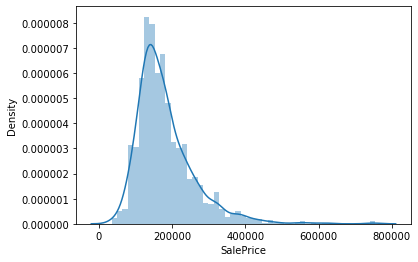

In [135]:
#histograms
sns.distplot(df_train['SalePrice'])

In [ ]:
#Deviation away from Normal 
#Positive skewed 

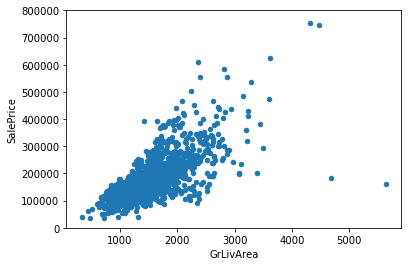

In [138]:
#linear relationship between GrLivArea Salesprice
df_train.plot.scatter(x = 'GrLivArea',y='SalePrice',ylim=(0,800000))

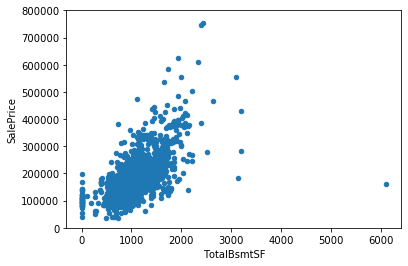

In [139]:
#linear relationship between GrLivArea Salesprice
df_train.plot.scatter(x = 'TotalBsmtSF',y='SalePrice',ylim=(0,800000))

In [142]:
df_train['OverallQual'].value_counts()

5     397
6     374
7     319
8     168
4     116
9      43
3      20
10     18
2       3
1       2
Name: OverallQual, dtype: int64

(-0.5, 9.5, 0, 800000)

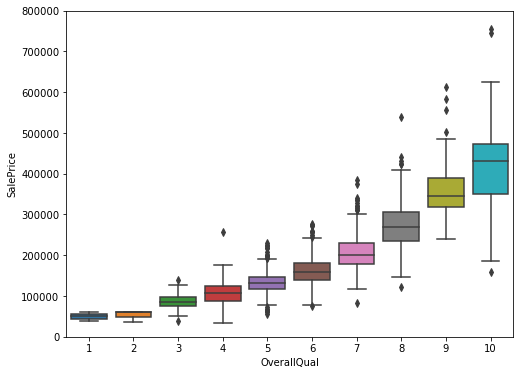

In [145]:
plt.subplots(figsize=(8,6))
fig = sns.boxplot(x = "OverallQual",y='SalePrice',data = df_train)
fig.axis(ymin=0,ymax=800000)

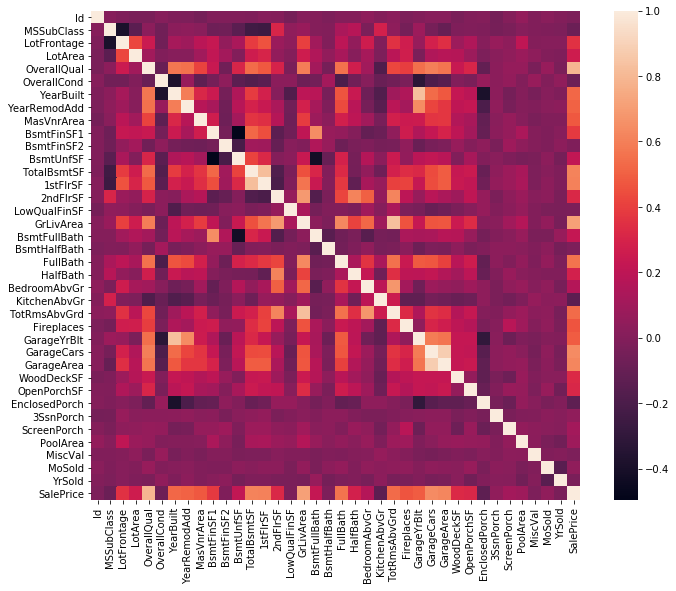

In [146]:
corrmat = df_train.corr()
plt.subplots(figsize = (12,9))
sns.heatmap(corrmat,square = True)

In [147]:
cols = corrmat.nlargest(10,'SalePrice')['SalePrice'].index

In [148]:
cols

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt'],
      dtype='object')

/Users/laxminarayen/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:1912: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


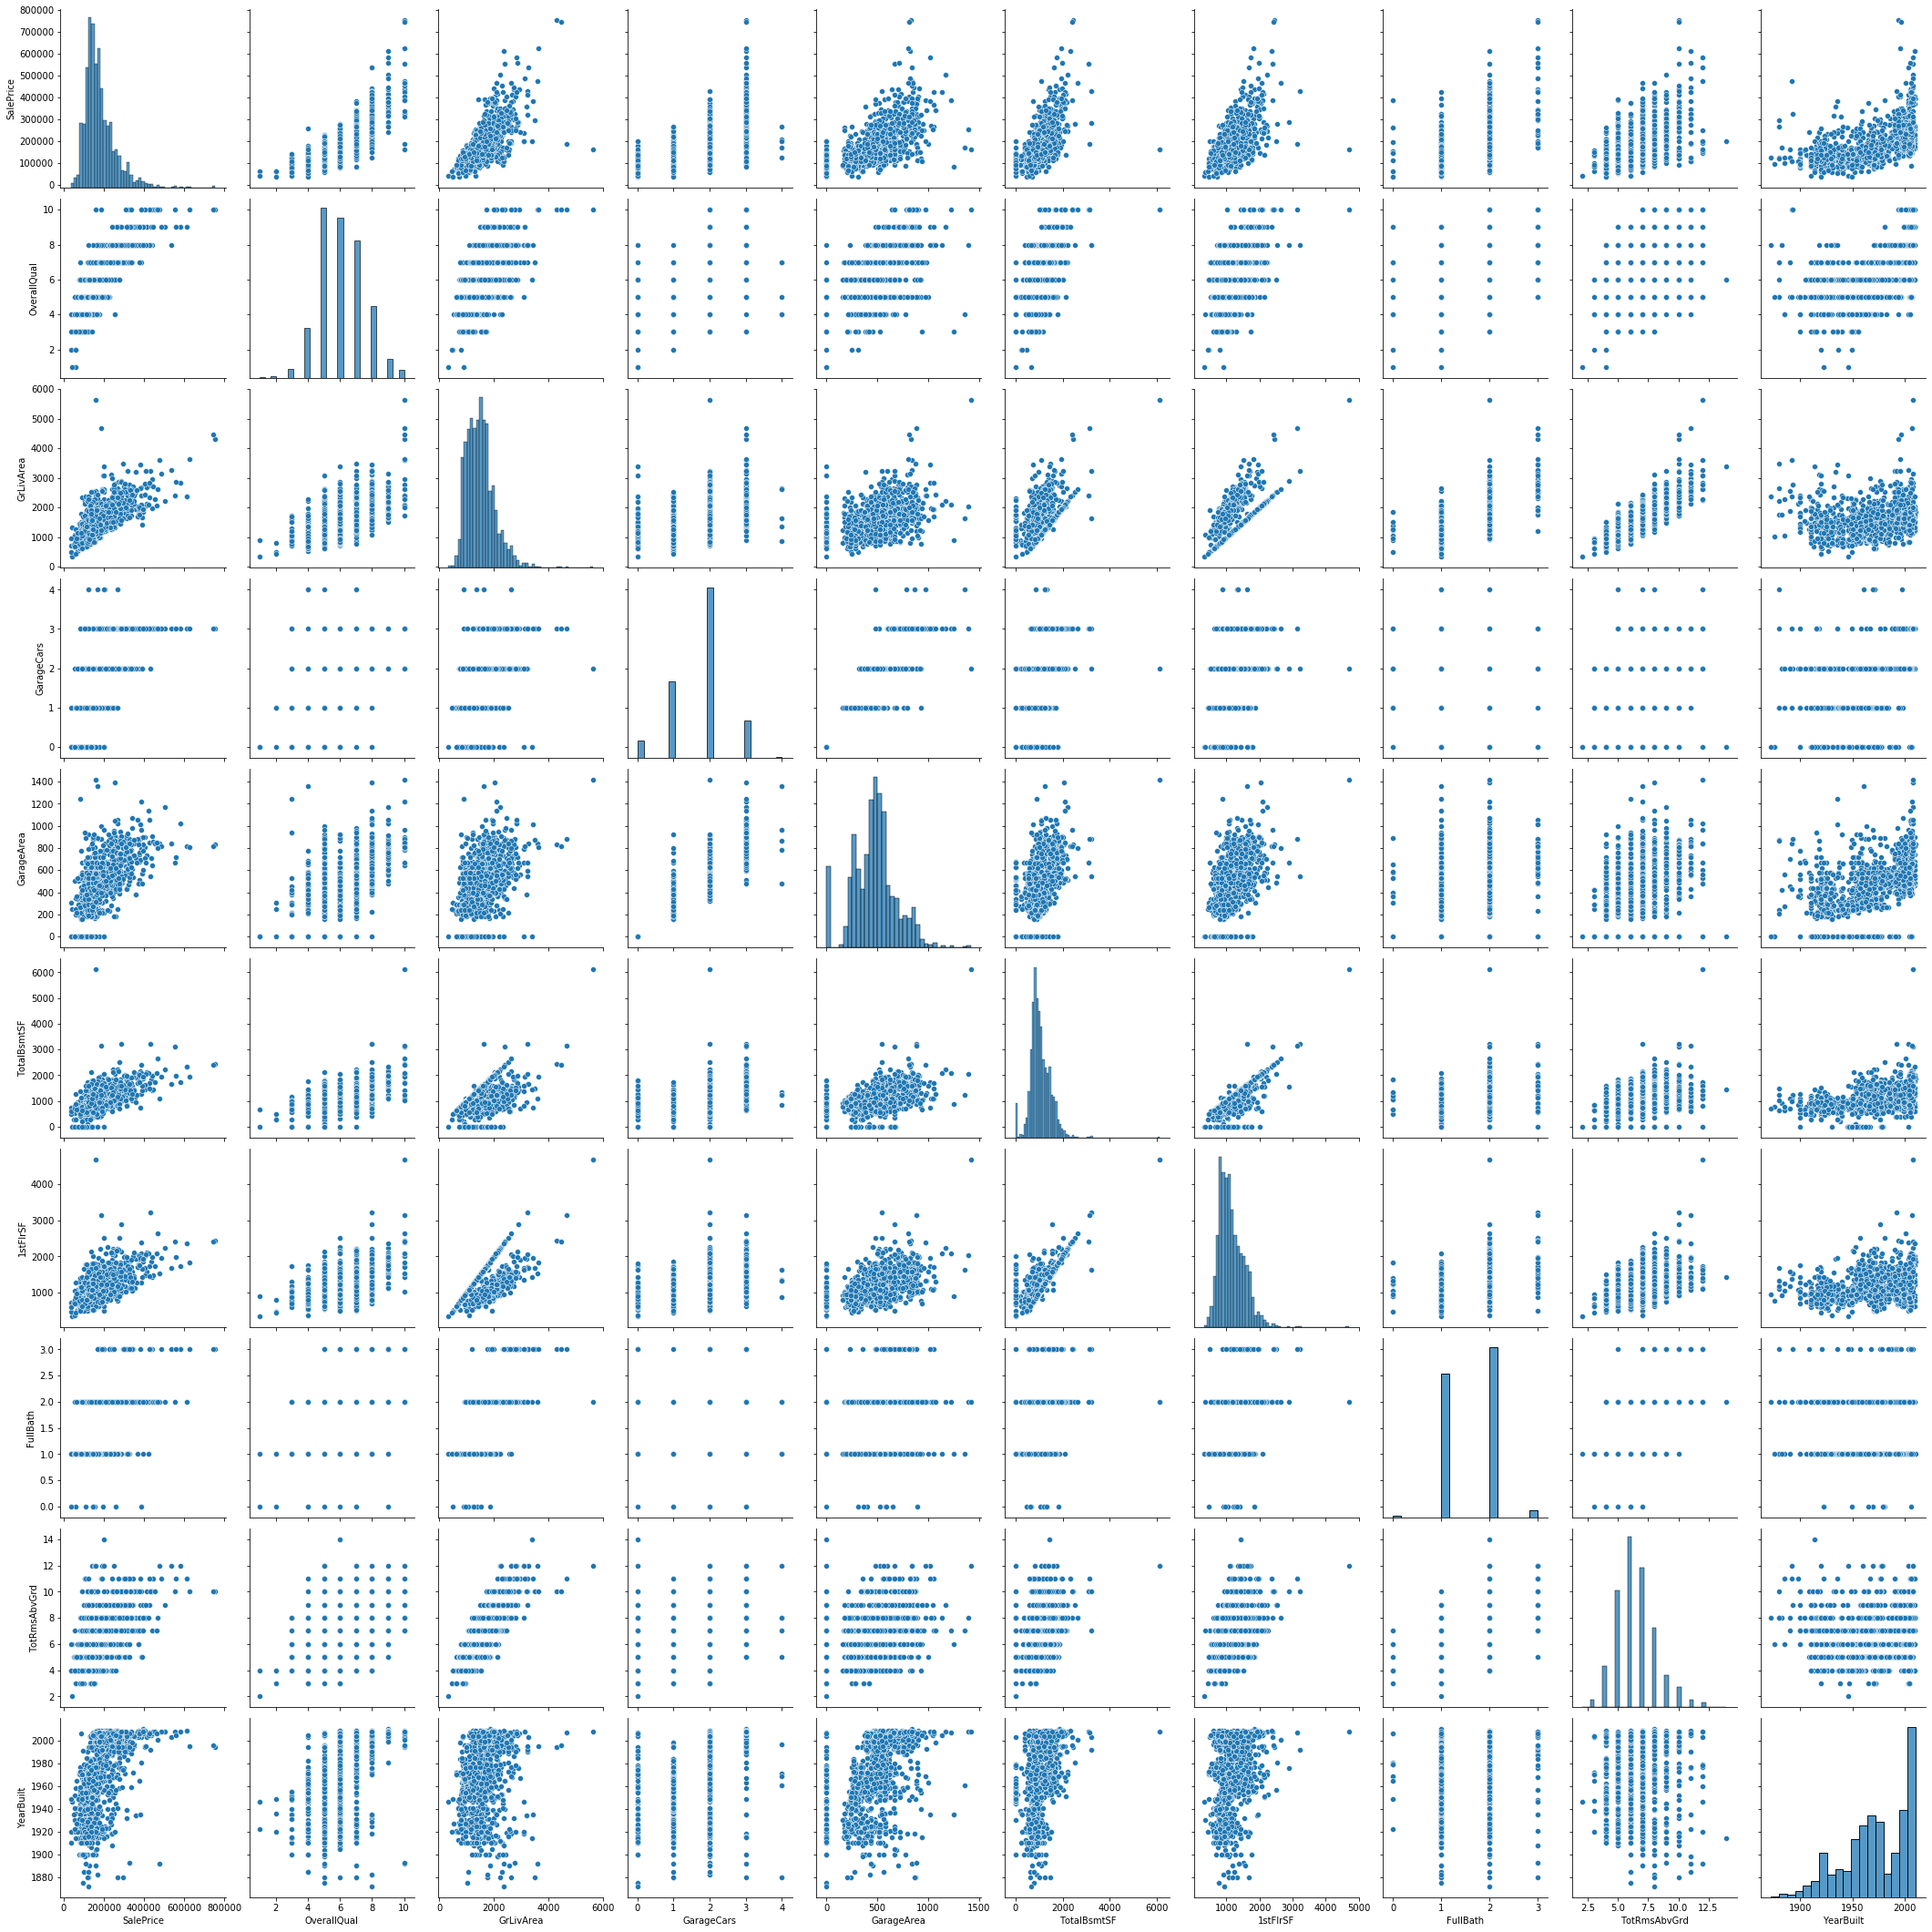

In [150]:
sns.pairplot(df_train[cols],size = 3)
plt.show()

In [ ]:
#Model - Computer - 'Inceptez is the best place to learn datascience' -Natural Language
1. Import libraries 
2. Import dataset 
3 a. EDA 
3 b. Look for impurities or Errors or inconsistencies